## Initial Imports

In [1]:
import numpy as np
from scm.plams import Settings, Molecule, Atom, AMSJob

## Setup Dimer
Create Helium atoms and an array of interatomic distances at which to run calculation.

In [2]:
# type of atoms
atom1 = "He"
atom2 = "He"

In [3]:
# interatomic distance values
dmin = 2.2
dmax = 4.2
step = 0.2

In [6]:
# create a list with interatomic distances
distances = np.arange(dmin, dmax, step)
print(distances)

[2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4. ]


## Calculation Settings

The calculation settins are stored in a `Settings` object.

In [7]:
# calculation parameters (single point, TZP/PBE+GrimmeD3)
sett = Settings()
sett.input.ams.task = "SinglePoint"
sett.input.adf.basis.type = "TZP"
sett.input.adf.xc.gga = "PBE"
sett.input.adf.xc.dispersion = "Grimme3"

## Create and Run Jobs

For each interatomic distance, create a Helium dimer molecule with the required geometry then the single point energy calculation job. Run the job and extract the energy. 

In [8]:
energies = []
for d in distances:
    mol = Molecule()
    mol.add_atom(Atom(symbol=atom1, coords=(0.0, 0.0, 0.0)))
    mol.add_atom(Atom(symbol=atom2, coords=(d, 0.0, 0.0)))
    job = AMSJob(molecule=mol, settings=sett, name=f"dist_{d:.2f}")
    job.run()
    energies.append(job.results.get_energy(unit="kcal/mol"))

[26.08|15:26:10] JOB dist_2.20 STARTED
[26.08|15:26:10] JOB dist_2.20 RUNNING
[26.08|15:26:11] JOB dist_2.20 FINISHED
[26.08|15:26:12] JOB dist_2.20 SUCCESSFUL
[26.08|15:26:12] JOB dist_2.40 STARTED
[26.08|15:26:12] JOB dist_2.40 RUNNING
[26.08|15:26:13] JOB dist_2.40 FINISHED
[26.08|15:26:13] JOB dist_2.40 SUCCESSFUL
[26.08|15:26:13] JOB dist_2.60 STARTED
[26.08|15:26:13] JOB dist_2.60 RUNNING
[26.08|15:26:15] JOB dist_2.60 FINISHED
[26.08|15:26:15] JOB dist_2.60 SUCCESSFUL
[26.08|15:26:15] JOB dist_2.80 STARTED
[26.08|15:26:15] JOB dist_2.80 RUNNING
[26.08|15:26:16] JOB dist_2.80 FINISHED
[26.08|15:26:16] JOB dist_2.80 SUCCESSFUL
[26.08|15:26:16] JOB dist_3.00 STARTED
[26.08|15:26:16] JOB dist_3.00 RUNNING
[26.08|15:26:18] JOB dist_3.00 FINISHED
[26.08|15:26:18] JOB dist_3.00 SUCCESSFUL
[26.08|15:26:18] JOB dist_3.20 STARTED
[26.08|15:26:18] JOB dist_3.20 RUNNING
[26.08|15:26:20] JOB dist_3.20 FINISHED
[26.08|15:26:20] JOB dist_3.20 SUCCESSFUL
[26.08|15:26:20] JOB dist_3.40 STARTED
[

## Results

Print table of results of the distance against the calculated energy.

In [9]:
print("== Results ==")
print("d[A]    E[kcal/mol]")
for d, e in zip(distances, energies):
    print(f"{d:.2f}    {e:.3f}")

== Results ==
d[A]    E[kcal/mol]
2.20    0.230
2.40    -0.054
2.60    -0.127
2.80    -0.122
3.00    -0.094
3.20    -0.066
3.40    -0.045
3.60    -0.030
3.80    -0.020
4.00    -0.013


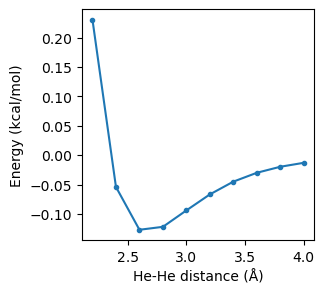

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3, 3))
ax.plot(distances, energies, ".-")
ax.set_xlabel("He-He distance (Å)")
ax.set_ylabel("Energy (kcal/mol)");